# Afrel 楕円コース PID制御 パラメータチューニング(twiddle)

In [1]:
from homework5_4.task import robot
from math import *
import matplotlib.pyplot as plt

## 楕円コース

- [楕円コース | すべての商品 | | 教育版LEGO MINDSTORMS正規代理店 アフレル](http://afrel-shop.com/shopdetail/007001000018/)

In [2]:
radius = 13.5
height = 9.0
width = 29.0
params = [1.0, 10.0, 0.01]

In [3]:
x_track = [cos((t * pi / 200) + (pi / 2)) * radius + radius for t in range(100)] + \
          [cos((t * pi / 200) + pi) * radius + radius for t in range(100)] + \
          [cos((t * pi / 200) + (3.0 * pi / 2)) * radius + radius + width for t in range(100)] + \
          [cos((t * pi / 200)) * radius + radius + width for t in range(100)] + \
          [radius]

y_track = [sin((t * pi / 200) + (pi / 2)) * radius + radius + height for t in range(100)] + \
          [sin((t * pi / 200) + pi) * radius + radius for t in range(100)] + \
          [sin((t * pi / 200) + (3.0 * pi / 2)) * radius + radius for t in range(100)] + \
          [sin((t * pi / 200)) * radius + radius + height for t in range(100)] + \
          [radius * 2.0 + height]

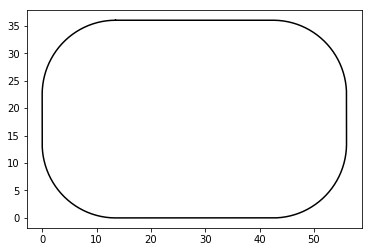

In [4]:
plt.figure()
plt.plot(x_track, y_track, 'k-')
plt.show()

## Running a robotic car

In [5]:
x_path = [0.0, ]
y_path = [radius, ]

In [6]:
myrobot = robot()
myrobot.set(0.0, radius, pi / 2.0)
speed = 1.0
err = 0.0
int_crosstrack_error = 0.0
N = 100

crosstrack_error = myrobot.cte(radius, width, height)

for i in range(N * 2):
    diff_crosstrack_error = - crosstrack_error
    crosstrack_error = myrobot.cte(radius, width, height)
    diff_crosstrack_error += crosstrack_error
    int_crosstrack_error += crosstrack_error
    steer = - params[0] * crosstrack_error \
            - params[1] * diff_crosstrack_error \
            - params[2] * int_crosstrack_error
    myrobot = myrobot.move(steer, speed)
    if i >= N:
        err += crosstrack_error ** 2
    x_path.append(myrobot.x)
    y_path.append(myrobot.y)

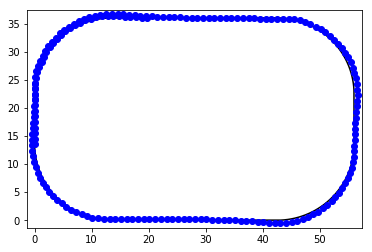

In [7]:
plt.plot(x_track, y_track, 'k-', x_path, y_path, 'bo')
plt.axis([-radius * 0.1, 2.1 * radius + width, -radius * 0.1, 2.1 * radius + height])
plt.show()

## Twiddle
- [Twiddle - Artificial Intelligence for Robotics - YouTube](https://www.youtube.com/watch?v=2uQ2BSzDvXs)

In [8]:
def run(params, printflag=False):
    myrobot = robot()
    myrobot.set(0.0, 1.0, 0.0)
    speed = 1.0
    err = 0.0
    int_crosstrack_error = 0.0
    N = 100
    # myrobot.set_noise(0.1, 0.0)
    myrobot.set_steering_drift(10.0 / 180.0 * pi)  # 10 degree steering error

    crosstrack_error = myrobot.y

    for i in range(N * 2):

        diff_crosstrack_error = myrobot.y - crosstrack_error
        crosstrack_error = myrobot.y
        int_crosstrack_error += crosstrack_error

        steer = - params[0] * crosstrack_error \
                - params[1] * diff_crosstrack_error \
                - int_crosstrack_error * params[2]
        myrobot = myrobot.move(steer, speed)
        if i >= N:
            err += (crosstrack_error ** 2)
        if printflag:
            print(myrobot, steer)
    return err / float(N)


def twiddle(tol=0.001):  #Make this tolerance bigger if you are timing out!
    p = [0, 0, 0]
    dp = [1, 1, 1]

    best_error = run(p)
    n = 0
    # sum = integral of the cross track error
    while sum(dp) > tol:
        print("Iteration {}, best error = {}".format(n, best_error))
        for i in range(len(p)):
            p[i] += dp[i]
            err = run(p)
            if err < best_error:
                # error is better than our best error
                best_error = err
                dp[i] *= 1.1
            else:
                # error is not better than before
                # try other directions
                p[i] -= 2.0 * dp[i]
                err = run(p)
                if err < best_error:
                    best_error = err
                    dp[i] *= 1.1
                else:
                    # did not succeed - decrease increments
                    p[i] += dp[i]
                    dp[i] *= 0.9
        n += 1
    return p

In [10]:
params = twiddle()
params

Iteration 0, best error = 8315.955485215645
Iteration 1, best error = 0.044546416135712856
Iteration 2, best error = 0.030667733375864255
Iteration 3, best error = 0.03046869606124707
Iteration 4, best error = 0.008518880324802245
Iteration 5, best error = 0.008518668206935719
Iteration 6, best error = 0.008518667701338564
Iteration 7, best error = 0.008518667701338564
Iteration 8, best error = 0.008518667701338564
Iteration 9, best error = 0.00851866770043554
Iteration 10, best error = 0.00851866770043554
Iteration 11, best error = 9.36429057863156e-13
Iteration 12, best error = 8.118576224499871e-15


Iteration 13, best error = 8.118576224499871e-15
Iteration 14, best error = 8.118576224499871e-15
Iteration 15, best error = 8.118576224499871e-15
Iteration 16, best error = 8.118576224499871e-15
Iteration 17, best error = 8.118576224499871e-15
Iteration 18, best error = 8.118576224499871e-15
Iteration 19, best error = 5.8949635515091935e-15
Iteration 20, best error = 2.935905344458206e-18
Iteration 21, best error = 2.935905344458206e-18
Iteration 22, best error = 2.935905344458206e-18
Iteration 23, best error = 1.240039961130423e-18
Iteration 24, best error = 1.240039961130423e-18
Iteration 25, best error = 1.240039961130423e-18
Iteration 26, best error = 7.043395458551602e-19
Iteration 27, best error = 6.448015619853438e-20
Iteration 28, best error = 6.448015619853438e-20
Iteration 29, best error = 6.448015619853438e-20
Iteration 30, best error = 6.448015619853438e-20
Iteration 31, best error = 4.91946882072856e-21


Iteration 32, best error = 4.91946882072856e-21
Iteration 33, best error = 9.615713358638735e-23
Iteration 34, best error = 9.615713358638735e-23
Iteration 35, best error = 9.615713358638735e-23
Iteration 36, best error = 9.615713358638735e-23
Iteration 37, best error = 9.615713358638735e-23
Iteration 38, best error = 9.615713358638735e-23
Iteration 39, best error = 9.615713358638735e-23


Iteration 40, best error = 9.615713358638735e-23
Iteration 41, best error = 9.615713358638735e-23
Iteration 42, best error = 9.615713358638735e-23
Iteration 43, best error = 9.615713358638735e-23
Iteration 44, best error = 9.615713358638735e-23
Iteration 45, best error = 9.615713358638735e-23
Iteration 46, best error = 9.615713358638735e-23
Iteration 47, best error = 9.615713358638735e-23
Iteration 48, best error = 9.615713358638735e-23
Iteration 49, best error = 9.615713358638735e-23
Iteration 50, best error = 9.615713358638735e-23
Iteration 51, best error = 9.615713358638735e-23
Iteration 52, best error = 9.615713358638735e-23
Iteration 53, best error = 9.615713358638735e-23
Iteration 54, best error = 9.615713358638735e-23
Iteration 55, best error = 9.615713358638735e-23
Iteration 56, best error = 9.615713358638735e-23
Iteration 57, best error = 9.615713358638735e-23
Iteration 58, best error = 9.615713358638735e-23


Iteration 59, best error = 9.615713358638735e-23
Iteration 60, best error = 9.615713358638735e-23
Iteration 61, best error = 9.615713358638735e-23
Iteration 62, best error = 9.615713358638735e-23
Iteration 63, best error = 9.615713358638735e-23
Iteration 64, best error = 9.615713358638735e-23
Iteration 65, best error = 9.615713358638735e-23
Iteration 66, best error = 9.615713358638735e-23
Iteration 67, best error = 9.615713358638735e-23
Iteration 68, best error = 9.615713358638735e-23
Iteration 69, best error = 9.615713358638735e-23
Iteration 70, best error = 8.52429893895755e-23


Iteration 71, best error = 8.52429893895755e-23
Iteration 72, best error = 6.89583556100888e-23
Iteration 73, best error = 6.89583556100888e-23
Iteration 74, best error = 6.89583556100888e-23
Iteration 75, best error = 4.145006145539035e-23
Iteration 76, best error = 4.145006145539035e-23
Iteration 77, best error = 4.145006145539035e-23
Iteration 78, best error = 4.145006145539035e-23
Iteration 79, best error = 2.5204962731676635e-23
Iteration 80, best error = 2.5204962731676635e-23
Iteration 81, best error = 2.5204962731676635e-23
Iteration 82, best error = 2.2815797166143525e-23
Iteration 83, best error = 2.2815797166143525e-23
Iteration 84, best error = 1.8528427475010002e-23
Iteration 85, best error = 1.692511989245343e-23
Iteration 86, best error = 1.4714089527272985e-23
Iteration 87, best error = 1.4714089527272985e-23
Iteration 88, best error = 1.4714089527272985e-23


Iteration 89, best error = 1.0446065646529456e-23
Iteration 90, best error = 1.0446065646529456e-23
Iteration 91, best error = 7.068232261492995e-24
Iteration 92, best error = 6.284762759979449e-24
Iteration 93, best error = 6.284762759979449e-24
Iteration 94, best error = 5.217848562917681e-24
Iteration 95, best error = 4.838097998336666e-24
Iteration 96, best error = 4.352319633069647e-24
Iteration 97, best error = 4.352319633069647e-24
Iteration 98, best error = 4.352319633069647e-24
Iteration 99, best error = 3.25800247296385e-24
Iteration 100, best error = 3.115690350598778e-24
Iteration 101, best error = 1.7799813352217147e-24
Iteration 102, best error = 1.7799813352217147e-24
Iteration 103, best error = 1.7799813352217147e-24
Iteration 104, best error = 1.6110446580330185e-24
Iteration 105, best error = 1.444549485191908e-24
Iteration 106, best error = 1.444549485191908e-24
Iteration 107, best error = 9.355395139345826e-25
Iteration 108, best error = 9.355395139345826e-25


[1.666025810674142, 7.575994288835168, 0.1650652674944419]